In [32]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings (2).csv


In [33]:
import pandas as pd
import io
ratings_df = pd.read_csv(io.BytesIO(uploaded['ratings (2).csv']))
print(ratings_df.shape)

(100836, 4)


In [34]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (2).csv


In [38]:
import pandas as pd
import io
movies_df = pd.read_csv(io.BytesIO(uploaded['movies (2).csv']))
print(movies_df.shape)

(9742, 3)


In [55]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [40]:
unique_user_ids = ratings_df['userId'].nunique()
print(unique_user_ids)

610


In [41]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

movie_ratings_count = merged_df.groupby('movieId')['rating'].count()

max_rated_movie_id = movie_ratings_count.idxmax()

max_rated_movie_title = movies_df[movies_df['movieId'] == max_rated_movie_id]['title'].iloc[0]

print({max_rated_movie_title})

{'Forrest Gump (1994)'}


In [19]:
from google.colab import files

uploaded = files.upload()

Saving tags.csv to tags.csv


In [29]:
import pandas as pd
import io

tags_df = pd.read_csv(io.BytesIO(uploaded['tags.csv']))


In [43]:
movie_id_matrix = 2571
matrix_tags = tags_df[tags_df['movieId'] == movie_id_matrix]['tag']

print(matrix_tags.unique())

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [45]:
terminator_2_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

terminator_2_ratings = ratings_df[ratings_df['movieId'] == terminator_2_movie_id]

average_rating = terminator_2_ratings['rating'].mean()

print(average_rating)

3.970982142857143


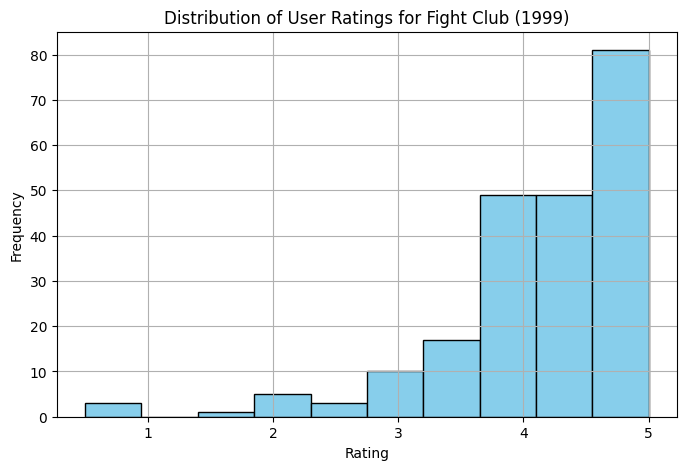

In [22]:
import matplotlib.pyplot as plt
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [23]:

grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [24]:
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

filtered_df = merged_df[merged_df['rating_count'] > 50]

print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [46]:

most_popular_movie = filtered_df[filtered_df['rating_mean'] == filtered_df['rating_mean'].max()]

print(most_popular_movie[['title', 'rating_mean']])


                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [47]:
top_5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

print(top_5_popular_movies[['title', 'rating_count']])


                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [48]:
scifi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_scifi_movies = scifi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]
print(third_most_popular_scifi_movie[['title', 'rating_count']])



title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [49]:
matrix_movie_id = 2571
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']

print("Unique tags for 'Matrix, The (1999)':")
print(matrix_tags.unique())

Unique tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [ ]:
#Without webscraping, applied on given csv files

In [60]:
highest_rated_movie_id = ratings_df.loc[ratings_df['rating'].idxmax()]['movieId']
print(highest_rated_movie_id)

47.0


In [61]:
merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='inner')

sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['rating'].idxmax()]

print(highest_rated_sci_fi_movie['movieId'])

24
